In [101]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Quantifying Greenwashing


# Background

### Problem Statement
##### The aim of this project is to analyze the language and behaviours of Fortune 500 companies around greenwashing.

<img src="https://scadmanor.com/wp-content/uploads/2020/02/Greenwashing-02-1024x683.png">


# Background: Data




 Fortune 500 Companies |  Instagram Verified
:-------------------------------:|:-------------------------:
![](https://www.uhsinc.com/wp-content/uploads/2020/05/fortune500_social_1200.png)  |  ![](https://nakedsecurity.sophos.com/wp-content/uploads/sites/2/2019/06/instagram-fake-verified-1.png)

## Background : Instagram Meta Data
- caption (demojized)
- hashtags
- tagged users
- is_sponsored
- is_video
- video_view_count
- likes
- comments
- location geotag


#  Background : Sustainability Ratings
CSR Interface           |  Verification
:-------------------------------:|:-------------------------:
![](https://blog.csrhub.com/hs-fs/hubfs/blog/CSRHub%20LLC%20ratings.png)  |  ![](https://3blaws.s3.amazonaws.com/images/How_CSRHub_Generates_a_Score-2017-06-22.jpg)



## Methods (Considered)


- Twitter + Instagram scraper, index
- Text Analysis

<img src="https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/NLTK-NLP-with-Python.jpg">

# Methods (Used)


##### List of vague, "green" words
- eco 
- organic
- green
- clean
- sustainable
- sustainability

# Methods: Green Word Counts and Frequencies



In [20]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('../data')
## import data
df1 = pd.read_csv('Data.csv')
df2 = pd.read_csv('fortune_500_companies.csv')

## merge company data, move later to clearning py
df = pd.merge(df1, df2[['username','STATE', 'EMPLOYEES', 'REVENUES', 'PROFIT']], on='username', how='left')


def scatter_plot(cols_list, df, Y, n_rows):
    ## turn list into dataframe
    graphing_df = df[cols_list]
    
    ## remove columns where every value is zero, because those are no fun!
    graphing_df.loc[:, (graphing_df != 0).any(axis=0)]
    
    ## set # of columns based on # of vars
    l = len(cols_list)
    n_cols = round((l/n_rows),0) + 1
    
    ## set size of figure
    fig_length = n_cols*3

    
    fig, ax = plt.subplots(figsize = (12, fig_length))
    ## plot
    for i, col in enumerate(graphing_df.columns):
        plt.subplot(n_cols,n_rows, i+1)
        feature = graphing_df.columns.values[i]
        sns.scatterplot(x=graphing_df[feature],y=Y,ax=plt.gca())
        ftitle = feature.split(',')[0].replace("('", "").replace("'", "")
        plt.title(ftitle,fontsize=18)
        #plt.title(col)
        #plt.axis('off')
    plt.tight_layout()

## add column for sum of all green words per company

df['total_green_mentions'] = df["('mentions_eco', 'sum')"] + df["('mentions_eco-friendly', 'sum')"] + df["('mentions_green', 'sum')"] + df["('mentions_organic', 'sum')"] +df["('mentions_clean', 'sum')"] + df["('mentions_sustainable', 'sum')"] + df["('mentions_sustainability', 'sum')"] + df["('mentions_carbon', 'sum')"] + df["('mentions_emissions', 'sum')"] 
df['total_green_hashtags'] = df["('hashtags_eco', 'sum')"] + df["('hashtags_eco-friendly', 'sum')"] + df["('hashtags_green', 'sum')"] + df["('hashtags_organic', 'sum')"] +df["('hashtags_clean', 'sum')"] + df["('hashtags_sustainable', 'sum')"] + df["('hashtags_sustainability', 'sum')"] + df["('hashtags_carbon', 'sum')"] + df["('hashtags_emissions', 'sum')"]
df['total_green_caption'] = df["('caption_eco', 'sum')"] + df["('caption_eco-friendly', 'sum')"] + df["('caption_green', 'sum')"] + df["('caption_organic', 'sum')"] +df["('caption_clean', 'sum')"] + df["('caption_sustainable', 'sum')"] + df["('caption_sustainability', 'sum')"] + df["('caption_carbon', 'sum')"] + df["('caption_emissions', 'sum')"]

df['total_green'] = df['total_green_mentions'] + df['total_green_hashtags'] + df['total_green_caption']    

totals_columns = [col for col in df.columns if 'total' in col]



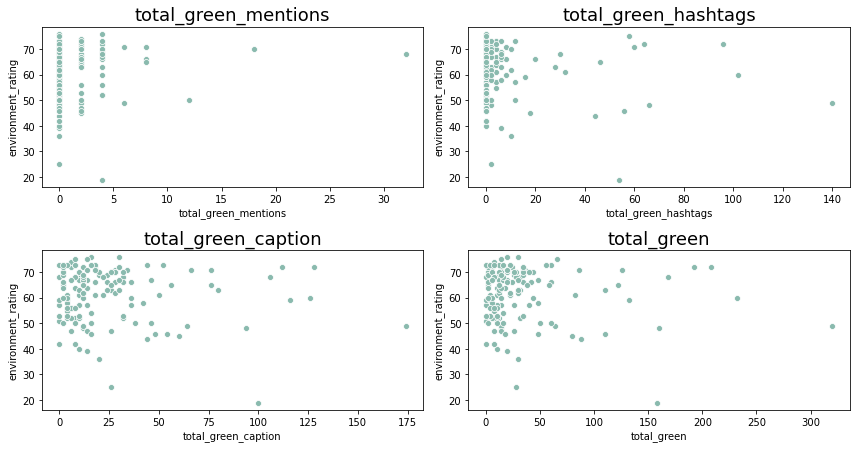

In [105]:


scatter_plot(totals_columns, df, df['environment_rating'], 2)
plt.show()

In [30]:
state_order = df.groupby("STATE")['environment_rating'].median().sort_values()[::-1].index


# Methods: Company Demographics as Controls

(1) HQ location (2) # of Employees (3) Profits (4) Revenue

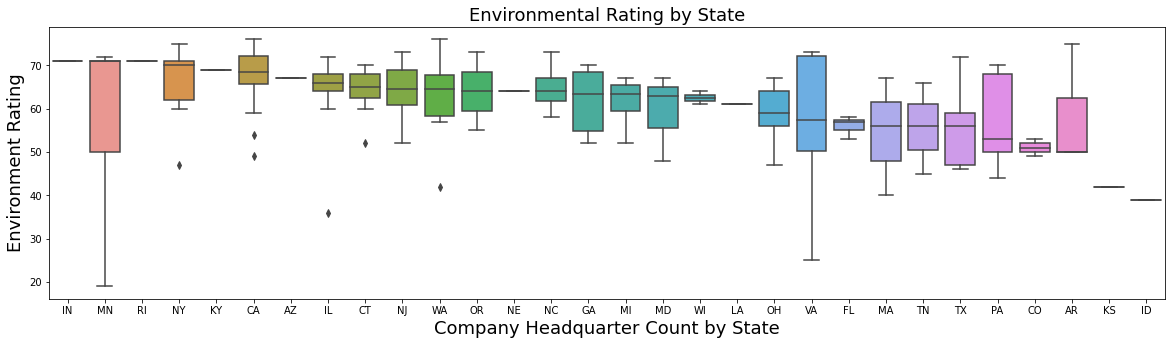

In [109]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(x='STATE', y='environment_rating', data=df, order = state_order)
ax.set_title("Environmental Rating by State", fontsize = 18)
ax.set_xlabel("Company Headquarter Count by State", fontsize = 18)
ax.set_ylabel("Environment Rating", fontsize = 18)
plt.show()

In [39]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#os.chdir('../')

## import data
#dat = pd.read_csv("greenwashing_data.csv")

dat['rating_bins'] = pd.qcut(dat['environment_rating'], 2, labels=False)

y = dat[['rating_bins']]
X = dat.drop(columns=['username','rating_bins', 'environment_rating', 'LN_PROFIT'])

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

search_space = [
    
    # NaiveBayes
    {'model': [NB()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[5,10,25,50]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DT()],
     'model__max_depth':[2,3,4]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
    'model__max_depth':[2,3,4],
    'model__n_estimators':[500,1000,1500]}
    
]

search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='roc_auc',
                      n_jobs=4)


search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [GaussianNB()]},
                         {'model': [KNeighborsClassifier()],
                          'model__n_neighbors': [5, 10, 25, 50]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [2, 3, 4]},
                         {'model': [RandomForestClassifier(max_depth=3,
                                                           n_estimators=1500)],
                          'model__max_depth': [2, 3, 4],
                          'model__n_estimators': [500, 1000, 1500]}],
             scoring='roc_auc')

# Preliminary Results

- RandomForrestClassifier
- ROC AUC: 0.98008
- R Squared: 0.87

In [42]:
search.best_score_
rf_mod = search.best_estimator_
search.best_params_

{'model': RandomForestClassifier(max_depth=3, n_estimators=1500),
 'model__max_depth': 3,
 'model__n_estimators': 1500}

In [43]:
m.roc_auc_score(train_y,rf_mod.predict_proba(train_X)[:,1])

0.9800824175824175

In [44]:
m.accuracy_score(train_y,rf_mod.predict(train_X))

0.8981481481481481

In [52]:
m.accuracy_score(train_y,rf_mod.predict(train_X))
from sklearn.inspection import permutation_importance
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=5)
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat



# Plot
def feat_importance(x):
    ggplot(vi_dat, aes(x="variable",y="vi")) + geom_col(alpha=x) + geom_point() + geom_errorbar(aes(ymin="low",ymax="high"),width=.2) + scale_x_discrete(limits=vi_dat.variable.tolist()) + coord_flip() + labs(y="Reduction in AUC ROC",x="")


In [59]:
# Plot
feature_importance = (
    ggplot(vi_dat,
          aes(x="variable",y="vi")) +
    geom_col(alpha=.5) +
    geom_point() +
    geom_errorbar(aes(ymin="low",ymax="high"),width=.2) +
    scale_x_discrete(limits=vi_dat.variable.tolist()) +
    coord_flip() +
    labs(y="Reduction in AUC ROC",x="")
)

## Preliminary Results: Feature Importance
(Only top features)

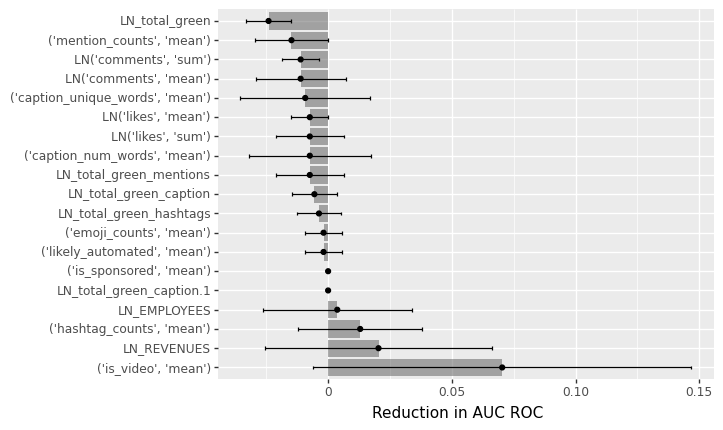

<ggplot: (159341303586)>

In [107]:
feature_importance


# Preliminary Results: Bivariate Visualization


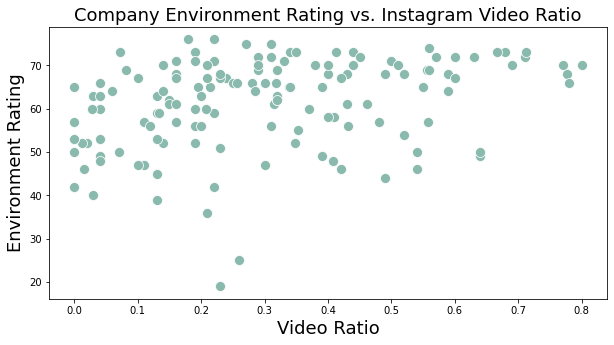

In [111]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data=dat, x="('is_video', 'mean')", y="environment_rating", s = 100, palette = colors)
ax.set_title("Company Environment Rating vs. Instagram Video Ratio", fontsize = 18)
ax.set_xlabel("Video Ratio", fontsize = 18)
ax.set_ylabel("Environment Rating", fontsize = 18)
plt.show()

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


## Preliminary Results
# Feed in the ineraction as a nested list
interacted_features = [["('is_video', 'mean')","('hashtag_counts', 'mean')"],["('is_video', 'mean')","LN_total_green"],["('hashtag_counts', 'mean')","LN_total_green"]] 

# Then business as usual when plotting

## Preliminary Results: Partial Dependency

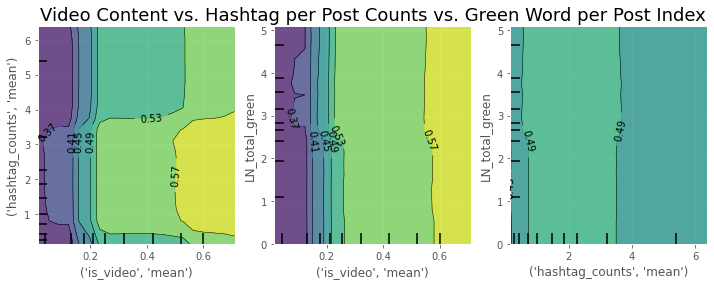

In [120]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Video Content vs. Hashtag per Post Counts vs. Green Word per Post Index", fontsize = 18)
display = plot_partial_dependence(
    rf_mod, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax)

In [82]:
from pdpbox import pdp
inter1  =  pdp.pdp_interact(model = rf_mod, 
                            dataset = train_X,
                            model_features = train_X.columns,
                            features=["('is_video', 'mean')","('hashtag_counts', 'mean')"])

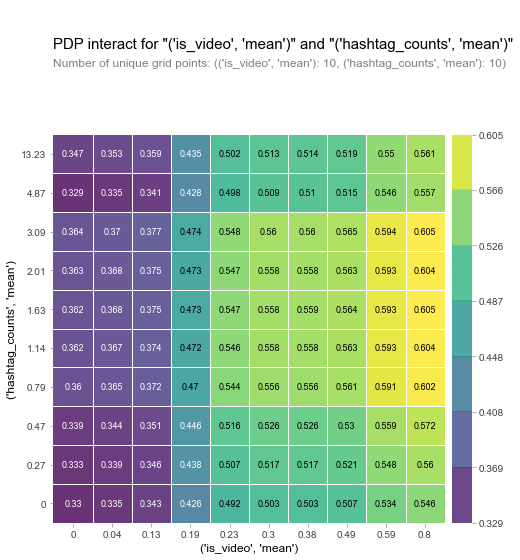

In [84]:
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=inter1, 
                               feature_names=["('is_video', 'mean')","('hashtag_counts', 'mean')"],
                               plot_type="grid")

In [90]:
# Create an array with the colors you want to use
colors = ["#8ABAAE","#5CA08E", "#2E856E","#006A4E"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))


dat['Green Words per Post Index'] = pd.qcut(dat["LN_total_green"], 4, labels=False)
dat['Hashtags per Post'] = dat["('hashtag_counts', 'mean')"]

## Preliminary Results: Mulivariate Visualization

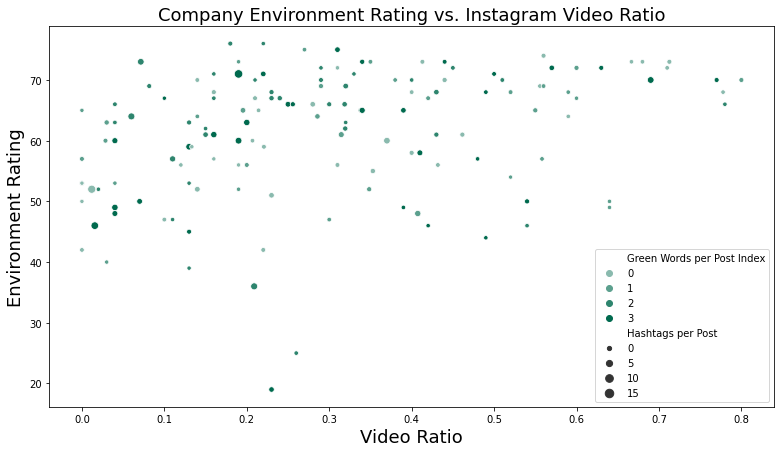

In [110]:
fig, ax = plt.subplots(figsize = (13, 7))
sns.scatterplot(data=dat, x="('is_video', 'mean')", y="environment_rating", hue = 'Green Words per Post Index', s = 1000, size = "Hashtags per Post",palette = colors)
ax.set_title("Company Environment Rating vs. Instagram Video Ratio", fontsize = 18)
ax.set_xlabel("Video Ratio", fontsize = 18)
ax.set_ylabel("Environment Rating", fontsize = 18)
plt.show()

## Future Plans



- Scrap more companies

- Add more "green" words

- Merging in additional company demographics
    - HQ political leanings/ policies
    - CSRHub Metrics
